<a href="https://colab.research.google.com/github/bhandari16arjun/keras-tuner/blob/main/LinearRegressionfromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab Notebook/data_for_lr.csv')

In [4]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
data.isna().sum()

,0
x,0
y,1


In [7]:
data=data.dropna()

In [8]:
train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)
test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:700]).reshape(199,1)

In [9]:
print(f"training input data shape ={train_input.shape}")

training input data shape =(500, 1)


In [10]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

In [11]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

In [12]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

In [13]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

In [14]:
def train(train_input, train_output, learning_rate, iters):

    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1

    plt.figure()

    #loss
    loss = list()

    #iterate
    for i in range(iters):

        #forward propagation
        predictions = forward_propagation(train_input, parameters)

        #cost function
        cost = cost_function(predictions, train_output)

        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))

        #plot function
        fig, ax = plt.subplots()

        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()

        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')

        plt.show()

        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)

        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss

In [15]:
import matplotlib.axes as ax

Iteration = 1, Loss = 4508.926276906686


<Figure size 640x480 with 0 Axes>

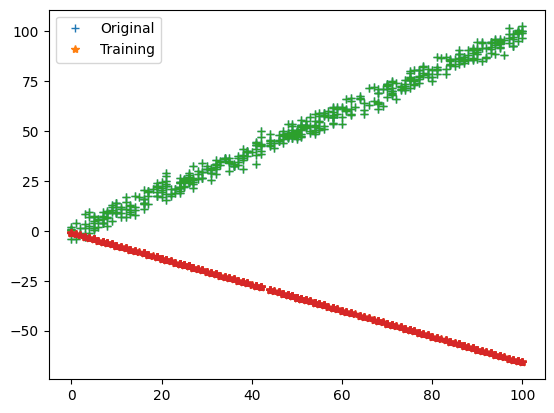

Iteration = 2, Loss = 2047.8693553473042


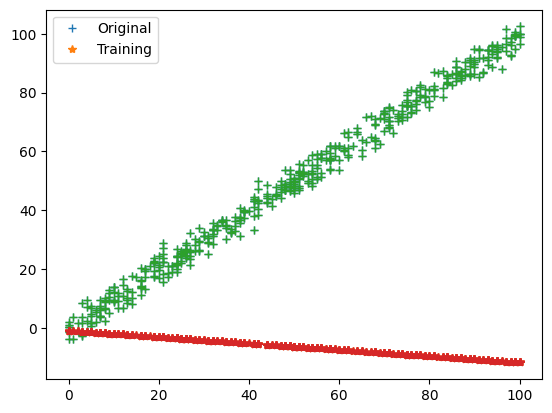

Iteration = 3, Loss = 931.28510264299


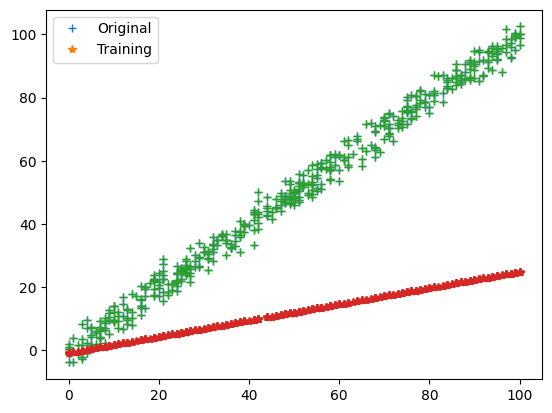

Iteration = 4, Loss = 424.6895889916316


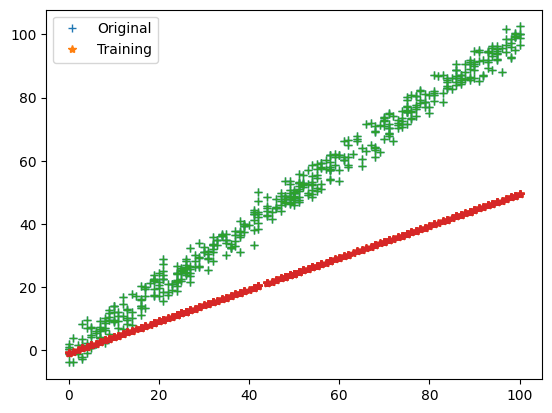

Iteration = 5, Loss = 194.8466418973381


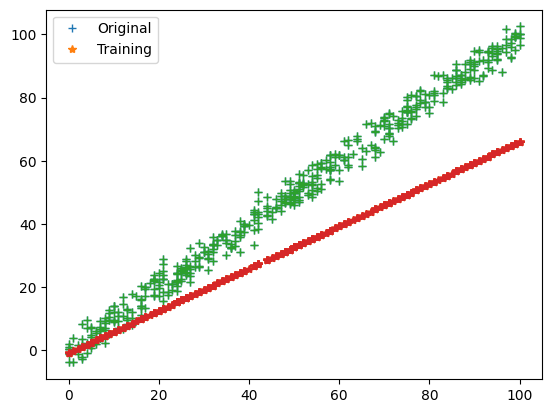

Iteration = 6, Loss = 90.5666407926058


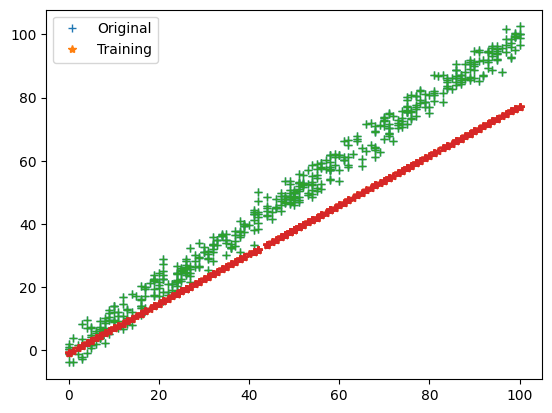

Iteration = 7, Loss = 43.25468736210314


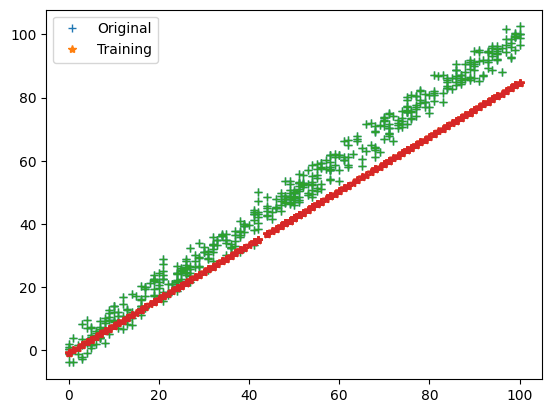

Iteration = 8, Loss = 21.78920026162768


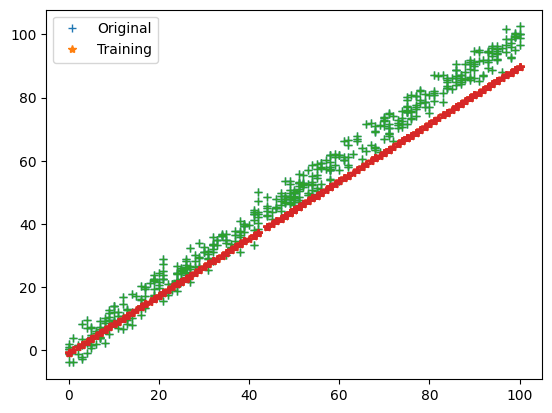

Iteration = 9, Loss = 12.050283563768607


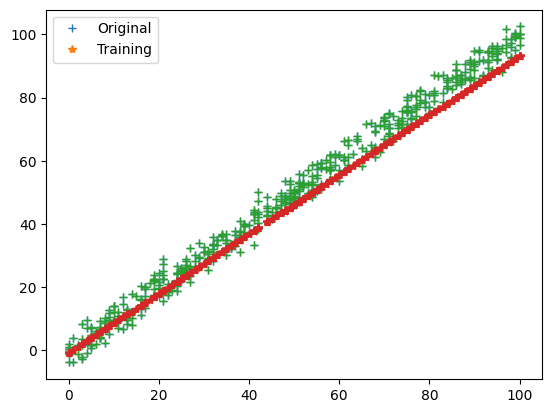

Iteration = 10, Loss = 7.631724846481054


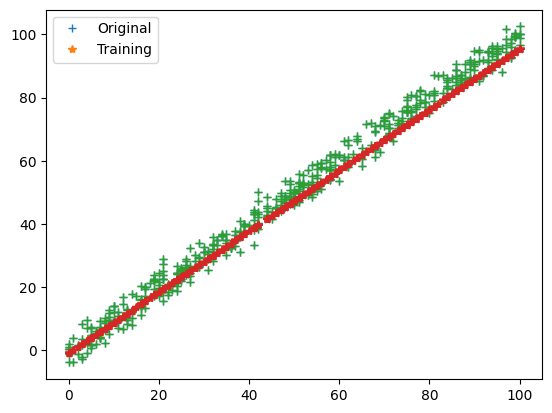

Iteration = 11, Loss = 5.627018438098328


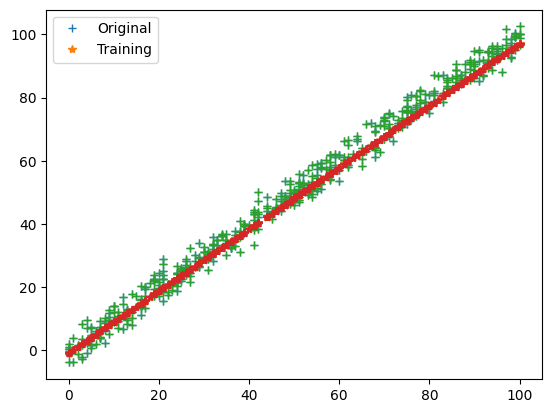

Iteration = 12, Loss = 4.717479496019752


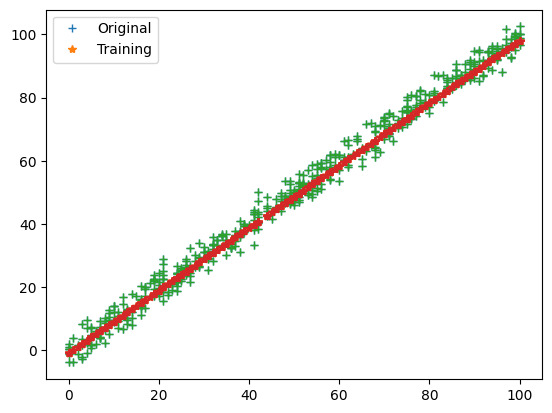

Iteration = 13, Loss = 4.304819246527719


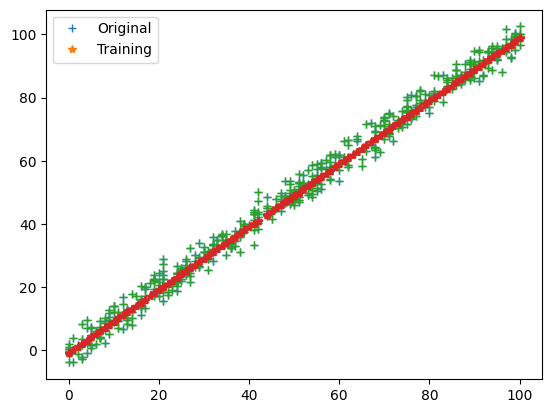

Iteration = 14, Loss = 4.117593410297259


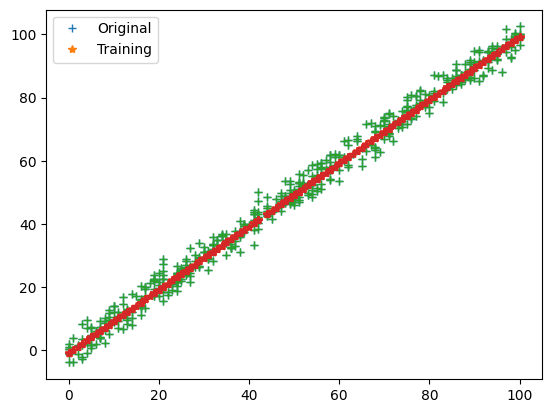

Iteration = 15, Loss = 4.032647417135754


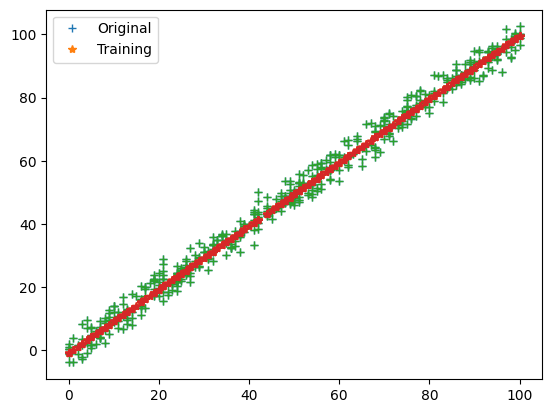

Iteration = 16, Loss = 3.9941059021357286


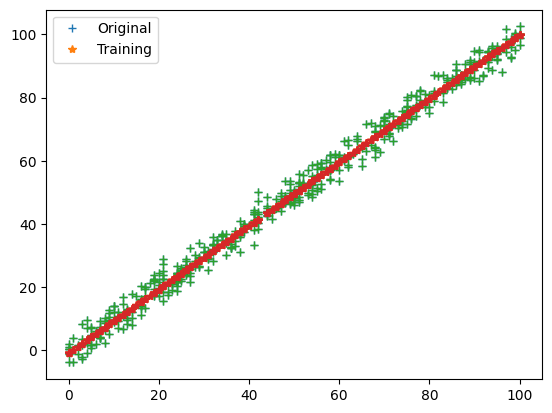

Iteration = 17, Loss = 3.9766181503488


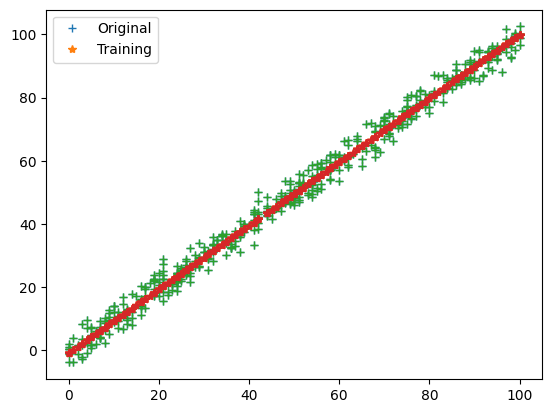

Iteration = 18, Loss = 3.9686825143233855


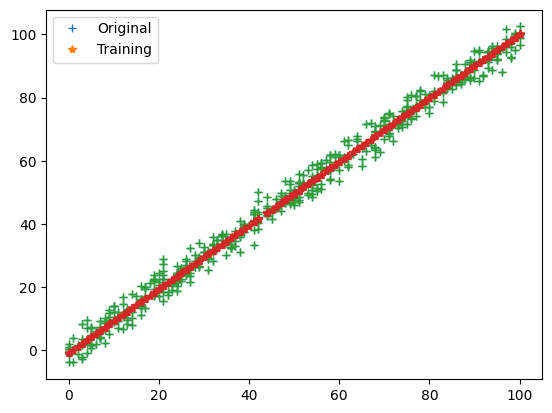

Iteration = 19, Loss = 3.965080683871005


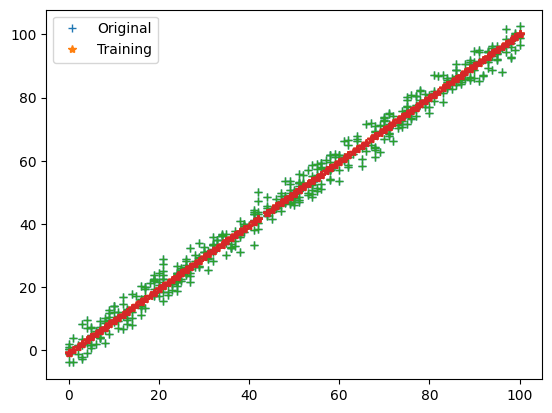

Iteration = 20, Loss = 3.963445105879122


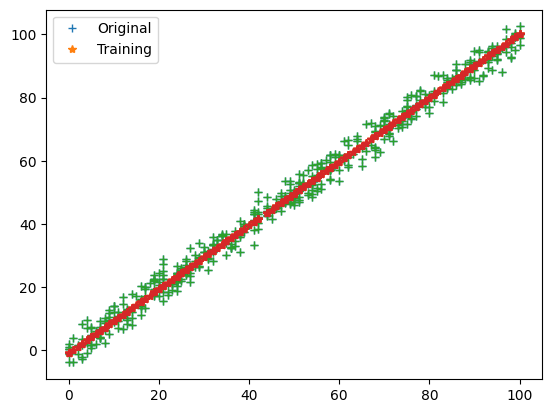

In [16]:
parameters , loss=train(train_input,train_output,0.0001,20)

In [17]:
print(parameters)

{'m': 1.010088103305858, 'c': -0.8768574932005516}


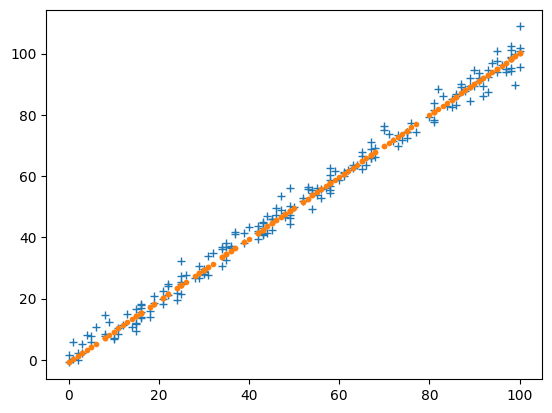

In [18]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

In [19]:
cost_function(test_predictions, test_output)

4.148075071923206

In [20]:
loss

[4508.926276906686,
 2047.8693553473042,
 931.28510264299,
 424.6895889916316,
 194.8466418973381,
 90.5666407926058,
 43.25468736210314,
 21.78920026162768,
 12.050283563768607,
 7.631724846481054,
 5.627018438098328,
 4.717479496019752,
 4.304819246527719,
 4.117593410297259,
 4.032647417135754,
 3.9941059021357286,
 3.9766181503488,
 3.9686825143233855,
 3.965080683871005,
 3.963445105879122]

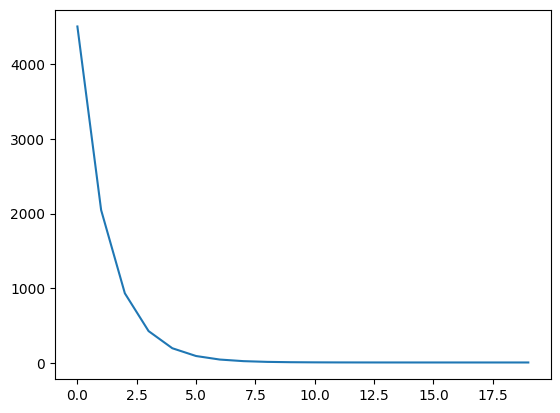

In [21]:
plt.plot(loss)

In [22]:
test_predictions=test_input*parameters['m']+parameters['c']

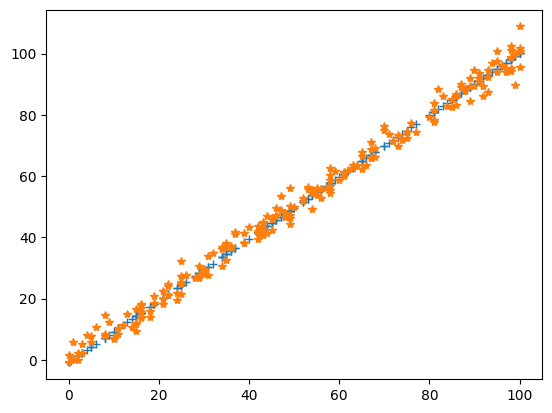

In [23]:
plt.plot(test_input,test_predictions,'+')
plt.plot(test_input,test_output,'*')
plt.show()

In [24]:
cost_function(test_output,test_predictions)

4.148075071923206

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr_model=LinearRegression()

In [27]:
lr_model.fit(train_input,train_output)

LinearRegression()

In [28]:
lr_model.coef_

array([[1.0009993]])

In [29]:
lr_model.intercept_

array([-0.23603461])

In [30]:
test_predictions=lr_model.predict(test_input)

In [31]:
test_predictions

array([[ 4.76896187],
       [60.82492252],
       [46.81093236],
       [97.86189652],
       [29.7939443 ],
       [62.82692111],
       [-0.23603461],
       [99.86389511],
       [17.78195274],
       [29.7939443 ],
       [97.86189652],
       [15.77995414],
       [21.78594992],
       [54.81892673],
       [42.80693517],
       [74.83891268],
       [90.85490143],
       [45.80993306],
       [84.84890565],
       [54.81892673],
       [35.79994009],
       [48.81293095],
       [93.85789933],
       [42.80693517],
       [21.78594992],
       [36.80093938],
       [23.78794852],
       [94.85889862],
       [60.82492252],
       [74.83891268],
       [67.8319176 ],
       [57.82192463],
       [ 4.76896187],
       [52.81692814],
       [79.84390916],
       [82.84690706],
       [24.78894782],
       [33.79794149],
       [25.78994711],
       [89.85390214],
       [59.82392322],
       [48.81293095],
       [18.78295203],
       [91.85590073],
       [28.79294501],
       [ 7